# Clustering(군집화)
- 여러 개의 데이터가 있을 때 군집화 하는 것을 의미합니다.
- 비슷한 데이터끼리 묶으면 관리하기가 쉽다는 장점이 생깁니다. 예를 들어 학원을 운영할 때 학생을 고급반, 중급반, 초급반으로 나눠 적절하게 분류한다면 데이터를 활용할 방안이 많이 생깁니다.
- 비지도 학습 알고리즘은 프로그래머가 정확한 방향성을 주지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화하는 알고리즘들이 비지도 학습에 속합니다. 대표적인 알고리즘은 KMeans 입니다.

# 군집화에 필요한 라이브러리를 import 합니다.
- numpy : 배열 처리를 쉽게 해주는 파이썬 패키지
- pandas : 데이터 관리를 쉡게 해주는파이썬 패키지
- matplotlib : 그래프 작성에 사용하는 파이썬 패키지
- seaborn : matplotlib를 기반으로 그래프를 좀 더 보기 좋게 구현하는 파이썬 패키지
- sklearn : 머신러닝 알고리즘을 모아놓은 파이썬 패키지

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

# 쥬피터 노트북에서 그림, 소리, 애니메이션과 같은 결과물을 보여주기 위한 표현 방식(Rich output 표현방식)
%matplotlib inline  

In [12]:
#데이터 불러오기
df = pd.read_csv('cluster.csv') 
# print(df)
# print(df.head()) # head() : 데이터 프레임 앞쪽 데이터를 인수로 지정한 개수 만큼 출력합니다. 개수를 생략하면 5개가 기본값으로 시용됩니다.
# print(df.tail()) # tail() : 데이터 프레임 앞쪽 데이터를 인수로 지정한 개수 만큼 출력합니다. 개수를 생략하면 5개가 기본값으로 시용됩니다.


# print(type(df.values))  #<class 'numpy.ndarray'>
# values : 데이터 프레임에 저장된 데이터만 numpy 타입으로 리턴합니다.
# print(df.index)  # RangeIndex(start=0, stop=30, step=1)
# index : 데이터 프레임의 인덱스를 리턴합니다. -> 행
# print(df.columns) #Index(['x', 'y'], dtype='object')
# colums : 데이터 프레임의 컬럼을 리턴합니다. -> 열


# 데이터 프레임에서 numpy 타입의 Clustering 학습에 사용할 데이터를 가져옵니다.
points = df.values
print(points)

[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


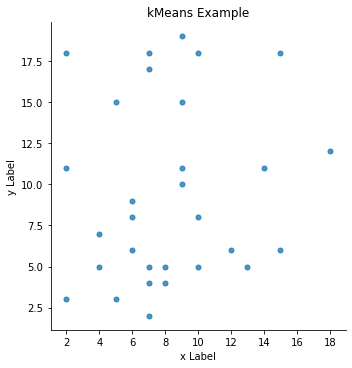

In [14]:
# matplotlib와 seaborn 라이브러리를 사용해 Clustering을 실행할 데이터를 시각화합니다.
# lmplot(): 데이터 프레임의 데이터를 x, y좌표를 사용하는 선점도 형태의 그래프를 작성합니다.
# sb.lmplot('x축으로 사용할 열이름', 'y축으로 사용할 열이름', '데이터 프레임 이름')
# fit_reg 옵션은 기본값이 True이고 회귀선 표시 유무를 지정하는데, 회귀선이 없는 그래프는 fig_reg 옵션을 사용하지 않거나 True를 사용하면
#에러가 발생합니다. -> 회귀선이 필요 없는 차트는 fit_reg = false로 설정합니다.
sb.lmplot('x','y', data=df, fit_reg=False, scatter_kws={'s':25})
plt.title('kMeans Example') #그래프 제목
plt.xlabel('x Label') # x 축 제목
plt.ylabel('y Label') # y 축 제목
pass # pass 없고 있고 차이 보기 

In [31]:
# KMeans 알고리즘을 이용해 Cluster 4개를 생성합니다.
# 별다른 설정을 하지 않으면 기본적으로 KMeans가 적용되므로 실행할 때마다 값이 변경될 수 있습니다.
# sklearn 라이브러리의 KMeans() 함수를 이용해 데이터 프레임의 데이터를 학습시킵니다.
# n_clusters : 군집화 할 cluster의 개수를 지정합니다.
# KMeans() 함수의 n_clusters 속성으로 군집화 할 cluster의 개수를 지정하고 fit() 함수를 사용해 학습을 시킵니다.
kmeans = KMeans(n_clusters=4).fit(points)
# kmeans.cluster_centers_ : 각각의 cluster 중심 위치를 리턴합니다.
print(kmeans.cluster_centers_) #각각 나뉘어진 구역(4구역)에 중심점만 가져온 것 
# kmeans.labels_ : 각각의 데이터가 속한 cluster를 리턴합니다.
print(kmeans.labels_)

# df 데이터 프레임에 cluster라는 열을 추가하고 군집화된 결과를 저장합니다.
df['cluster'] = kmeans.labels_  #cluster라는 열을 추가 
print(df)

#pandas 라이브러리의 to_csv() 함수를 이용해 데이터 프레임을 csv 파일로 저장합니다.
df.to_csv('save.csv')






[[11.14285714  7.28571429]
 [ 5.53846154  5.53846154]
 [ 7.         17.14285714]
 [15.66666667 13.66666667]]
[1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1 1 0 0 2 2 0 0 2 0 0 3 0 3 3]
     x   y  cluster
0    2   3        1
1    2  11        1
2    2  18        2
3    4   5        1
4    4   7        1
5    5   3        1
6    5  15        2
7    6   6        1
8    6   8        1
9    6   9        1
10   7   2        1
11   7   4        1
12   7   5        1
13   7  17        2
14   7  18        2
15   8   5        1
16   8   4        1
17   9  10        0
18   9  11        0
19   9  15        2
20   9  19        2
21  10   5        0
22  10   8        0
23  10  18        2
24  12   6        0
25  13   5        0
26  14  11        3
27  15   6        0
28  15  18        3
29  18  12        3


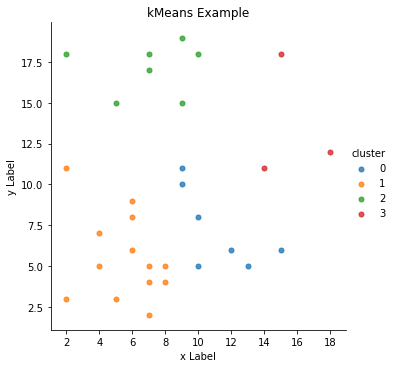

In [32]:
# clustering된 결과를 시각화합니다.
# 군집화된 결과를 hue 속성을 이용해 색으로 구분합니다.

sb.lmplot('x','y', data=df, fit_reg=False, scatter_kws={'s':25},hue='cluster')
plt.title('kMeans Example') #그래프 제목
plt.xlabel('x Label') # x 축 제목
plt.ylabel('y Label') # y 축 제목
pass

